Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the automobile dataset, complete the steps outlined in this notebook by writing code in the cells.

## Executive Summary

- Cleaned and validated the Automobile dataset (duplicates, missing values, and numeric types).
- Identified strong positive relationships between price, engine size, and horsepower.
- Found clear price differences across drive wheels and body styles.
- Highlighted top fuel-efficient manufacturers and contrasted expensive vs. budget models.

## Business Questions

- Which features most strongly relate to vehicle price?
- How does price vary by fuel type, drive wheels, and number of doors?
- Which manufacturers build the most fuel-efficient vehicles?
- Which vehicles have the largest engine capacity?
- Which manufacturers appear most frequently in the dataset?


In [36]:
# Import libraries
# -------------------------------

import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# Load the dataset
# -------------------------------
automobiles_df = pd.read_csv('automobile.txt')

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['normalized-losses', 'symboling']` from the data set as they will not be used in the analysis.

In [38]:

automobiles_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [39]:
# Remove unnecessary columns
# -------------------------------
automobiles_df = automobiles_df.drop(['normalized-losses', 'symboling'], axis=1)

# Display the updated dataframe
# -------------------------------
automobiles_df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Remove any duplicate rows

In [40]:
# Check how many duplicate rows are in the dataset
# -------------------------------
automobiles_df.duplicated().sum()

# Remove duplicate rows
# -------------------------------
automobiles_df = automobiles_df.drop_duplicates()

# Confirm duplicates are gone
# -------------------------------
automobiles_df.duplicated().sum()



np.int64(0)

In [41]:

# Check shape before removing duplicates
# -------------------------------
before_rows = automobiles_df.shape[0]

# Remove duplicate rows
# -------------------------------
automobiles_df = automobiles_df.drop_duplicates()

# Check shape after removing duplicates
# -------------------------------
after_rows = automobiles_df.shape[0]

# Show how many rows were removed
# -------------------------------
print(f"Rows before removing duplicates: {before_rows}")
print(f"Rows after removing duplicates: {after_rows}")
print(f"Total duplicate rows removed: {before_rows - after_rows}")


Rows before removing duplicates: 205
Rows after removing duplicates: 205
Total duplicate rows removed: 0


#### Remove rows with missing data

Some automobiles in the database have missing values which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [42]:
# Check how many rows have missing values
# -------------------------------
rows_with_missing = automobiles_df.isnull().any(axis=1).sum()
print("Total rows with missing values:", rows_with_missing)

# Check shape before removal
# -------------------------------
before_rows = automobiles_df.shape[0]

# Remove rows with missing data
# -------------------------------
automobiles_df = automobiles_df.dropna()

# Check shape after removal
# -------------------------------
after_rows = automobiles_df.shape[0]

# Show how many rows were removed
# -------------------------------
print(f"Rows before cleaning: {before_rows}")
print(f"Rows after cleaning: {after_rows}")
print(f"Total rows removed due to missing data: {before_rows - after_rows}")

# Confirm missing values are gone
# -------------------------------
print("\nMissing values after removal:")
print(automobiles_df.isnull().sum())


Total rows with missing values: 0
Rows before cleaning: 205
Rows after cleaning: 205
Total rows removed due to missing data: 0

Missing values after removal:
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


Change columns with numerical data column to an integer data type using numpy’s `int64` method.

In [43]:
# Replace '?' with NaN
# -------------------------------
automobiles_df.replace('?', np.nan, inplace=True)

# Convert numeric object columns to numeric
# -------------------------------
cols_to_convert = ['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
automobiles_df[cols_to_convert] = automobiles_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Fill missing numeric values with median (better than mean)
# -------------------------------
automobiles_df[cols_to_convert] = automobiles_df[cols_to_convert].fillna(automobiles_df[cols_to_convert].median())

# -------------------------------
numeric_cols = automobiles_df.select_dtypes(include=['float64', 'int64']).columns

# Convert to int64 type
# -------------------------------
automobiles_df[numeric_cols] = automobiles_df[numeric_cols].astype(np.int64)

print("Conversion successful!")
automobiles_df.dtypes


Conversion successful!


make                 object
fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
wheel-base            int64
length                int64
width                 int64
height                int64
curb-weight           int64
engine-type          object
num-of-cylinders     object
engine-size           int64
fuel-system          object
bore                  int64
stroke                int64
compression-ratio     int64
horsepower            int64
peak-rpm              int64
city-mpg              int64
highway-mpg           int64
price                 int64
dtype: object

### Finding Certain Categories
Locate all automobiles in the "hatchback" genre.

In [44]:
# Create a dataframe with all the cars in the "hatchback' category
# hatchback_cars =

# Filter all hatchback cars
# -------------------------------
hatchback_cars = automobiles_df[automobiles_df['body-style'] == 'hatchback']

# Display the first few hatchback cars
# -------------------------------
print("First 10 hatchback cars:")
print(hatchback_cars.head(10))

# Count total number of hatchback cars
# -------------------------------
total_hatchbacks = hatchback_cars.shape[0]
print(f"\nTotal number of hatchback cars: {total_hatchbacks}")


First 10 hatchback cars:
           make fuel-type aspiration num-of-doors body-style drive-wheels  \
2   alfa-romero       gas        std          two  hatchback          rwd   
9          audi       gas      turbo          two  hatchback          4wd   
18    chevrolet       gas        std          two  hatchback          fwd   
19    chevrolet       gas        std          two  hatchback          fwd   
21        dodge       gas        std          two  hatchback          fwd   
22        dodge       gas        std          two  hatchback          fwd   
23        dodge       gas      turbo          two  hatchback          fwd   
24        dodge       gas        std         four  hatchback          fwd   
29        dodge       gas      turbo          two  hatchback          fwd   
30        honda       gas        std          two  hatchback          fwd   

   engine-location  wheel-base  length  width  ...  engine-size  fuel-system  \
2            front          94     171     65  

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

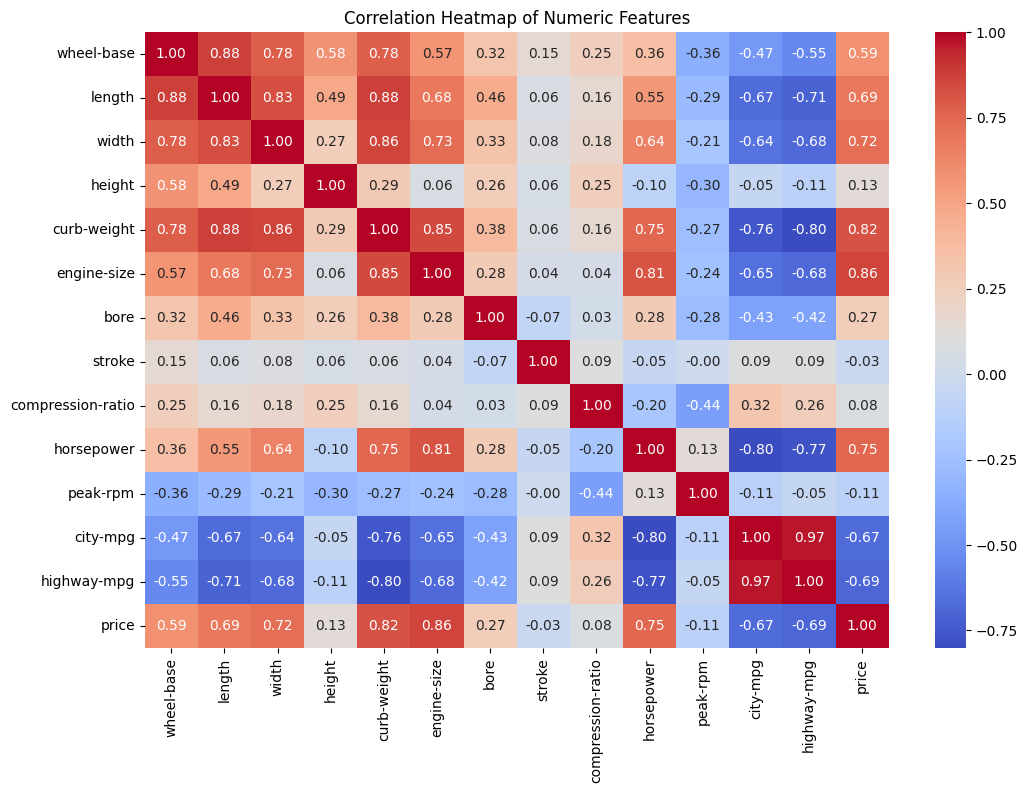

In [45]:

# Select only numeric columns
# -------------------------------
numeric_df = automobiles_df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
# -------------------------------
corr_matrix = numeric_df.corr()

# Display correlation heatmap
# -------------------------------
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Explanation:
Shows how numeric features relate to each other.
Values near 1 → strong positive correlation, near -1 → strong negative correlation.
Example: engine-size and price often have a strong positive correlation.

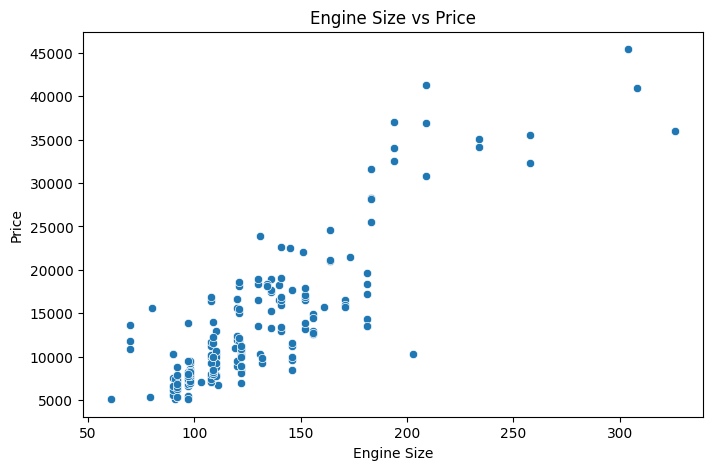

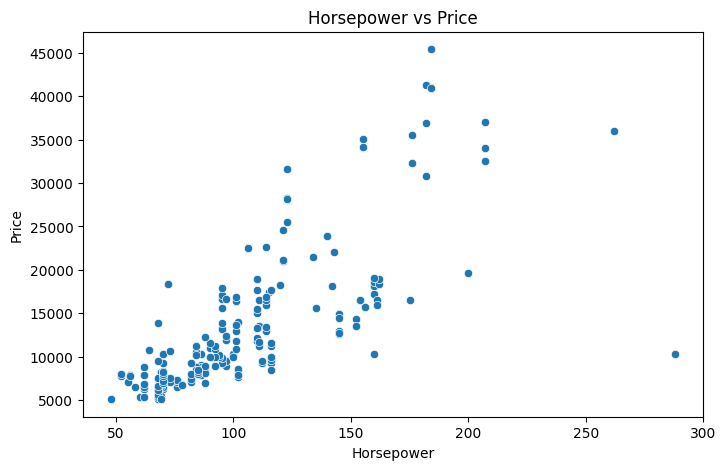

In [46]:
# Engine Size vs Price
# -------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(data=numeric_df, x='engine-size', y='price')
plt.title('Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

# Horsepower vs Price
# -------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(data=numeric_df, x='horsepower', y='price')
plt.title('Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()


Explanation:
Scatterplots help visualize trends between two numeric features.
Positive trend means as one feature increases, the other tends to increase

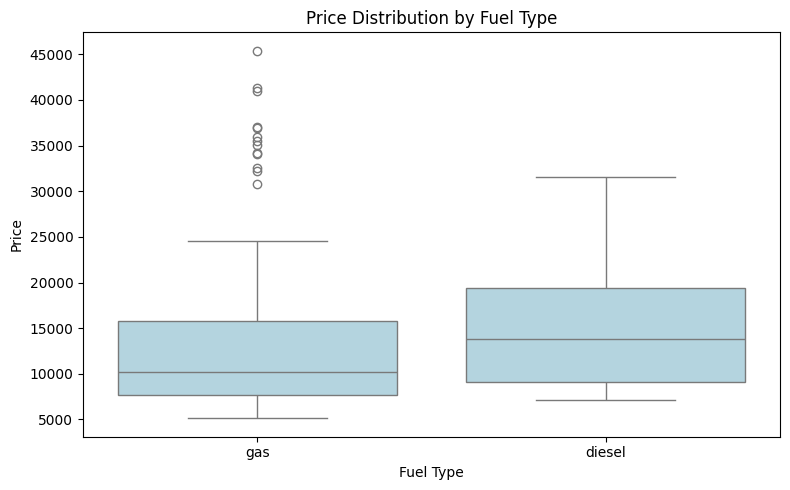

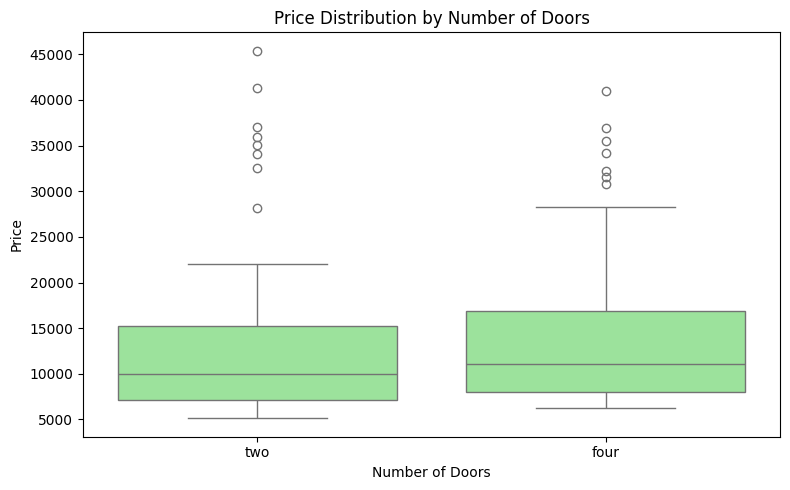

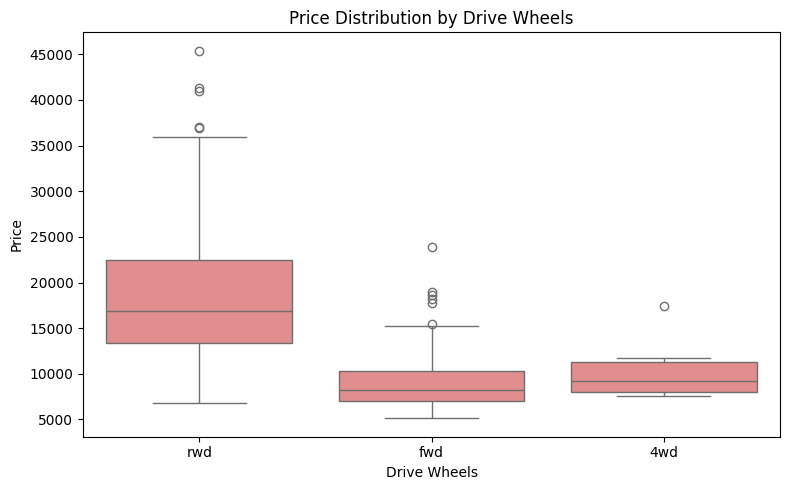

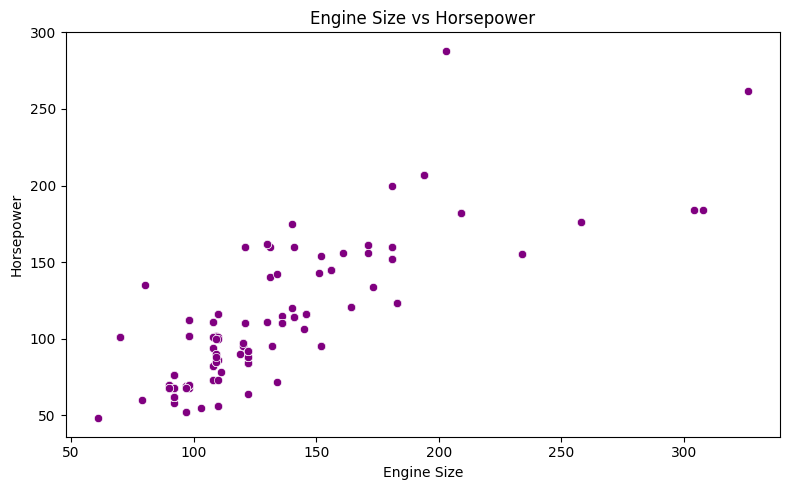

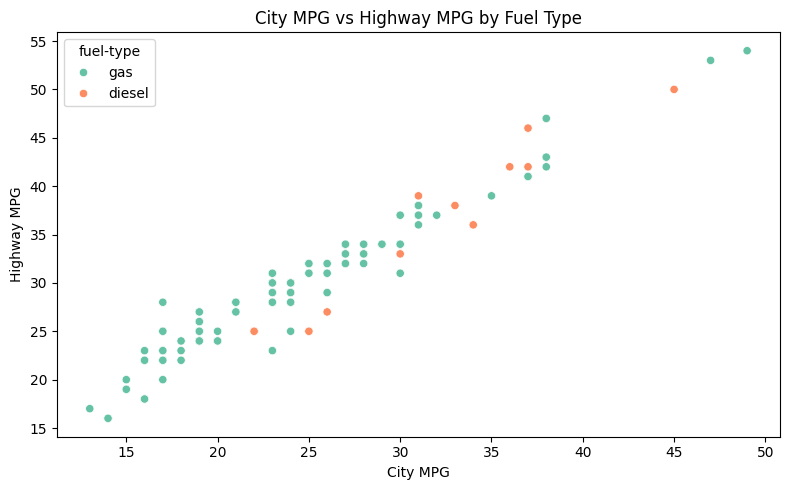

In [47]:

# Price distribution by fuel type
# -------------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='fuel-type',
    y='price',
    data=automobiles_df,
    color='lightblue'
)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# Price distribution by number of doors
# -------------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='num-of-doors',
    y='price',
    data=automobiles_df,
    color='lightgreen'
)
plt.title('Price Distribution by Number of Doors')
plt.xlabel('Number of Doors')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# Price distribution by drive wheels
# -------------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='drive-wheels',
    y='price',
    data=automobiles_df,
    color='lightcoral'
)
plt.title('Price Distribution by Drive Wheels')
plt.xlabel('Drive Wheels')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# Engine size vs horsepower scatter plot
# -------------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=automobiles_df,
    x='engine-size',
    y='horsepower',
    color='purple'
)
plt.title('Engine Size vs Horsepower')
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.tight_layout()
plt.show()

# City MPG vs Highway MPG by fuel type
# -------------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=automobiles_df,
    x='city-mpg',
    y='highway-mpg',
    hue='fuel-type',  # set hue explicitly
    palette='Set2'
)
plt.title('City MPG vs Highway MPG by Fuel Type')
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.tight_layout()
plt.show()


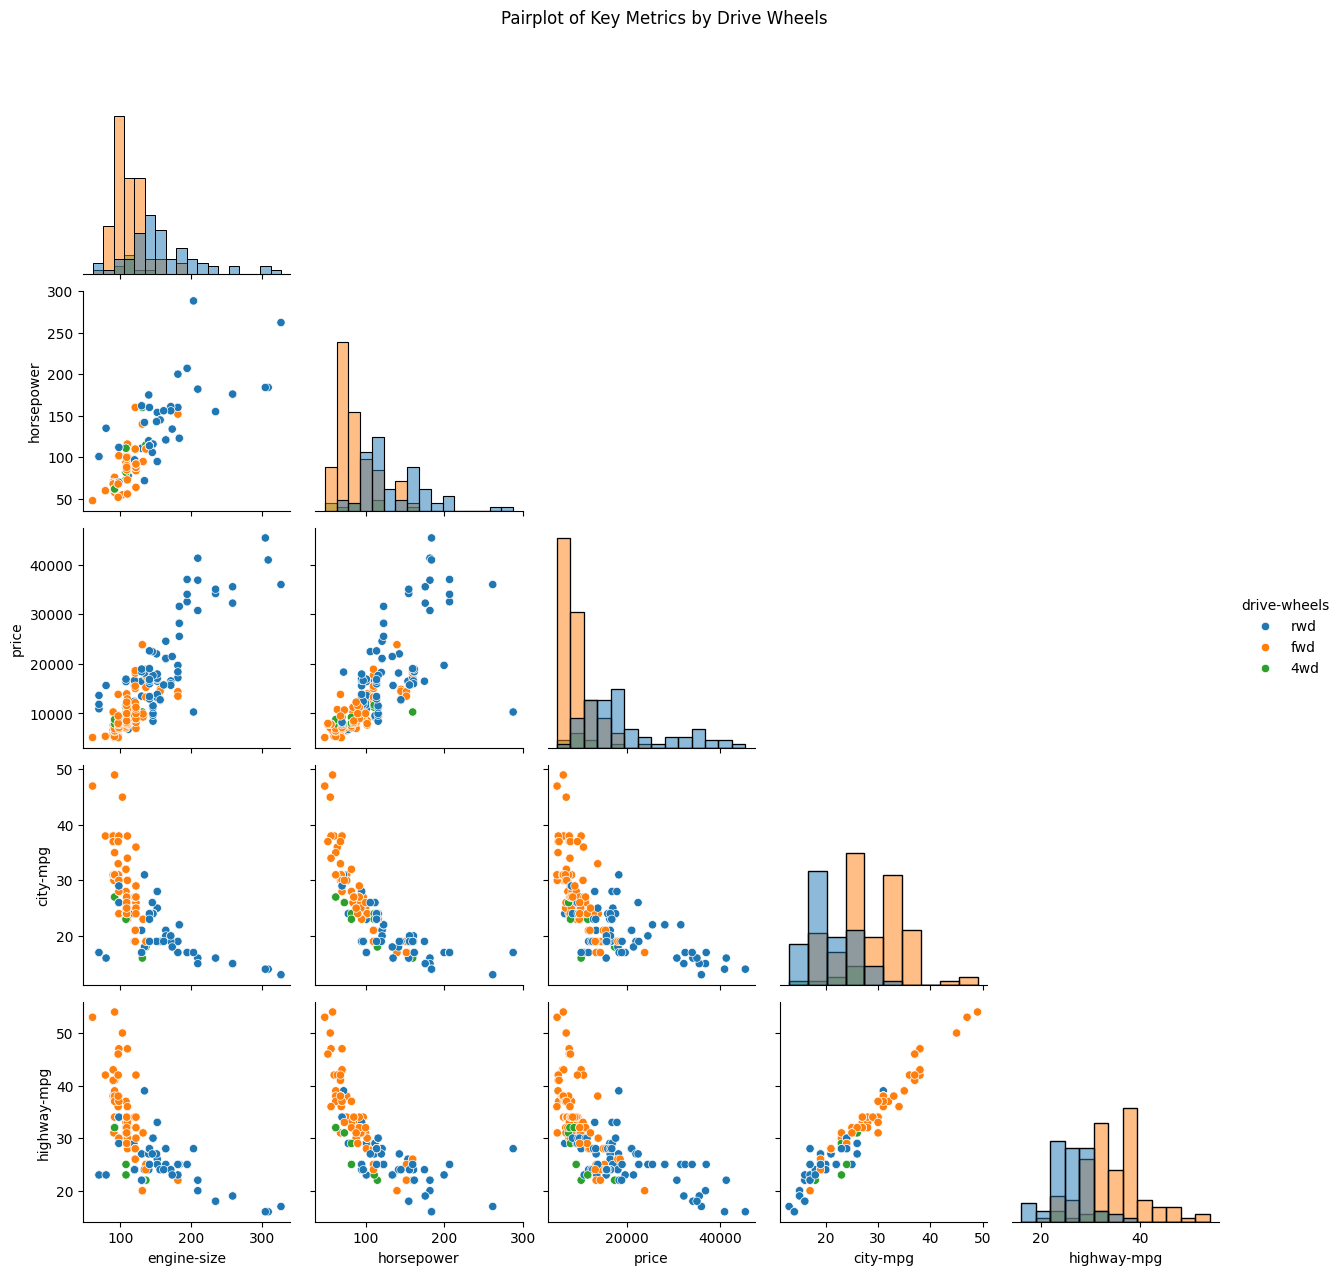

/var/folders/yz/xv2ctgls31502pbqssxjb7qw0000gn/T/ipykernel_33910/2542917463.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


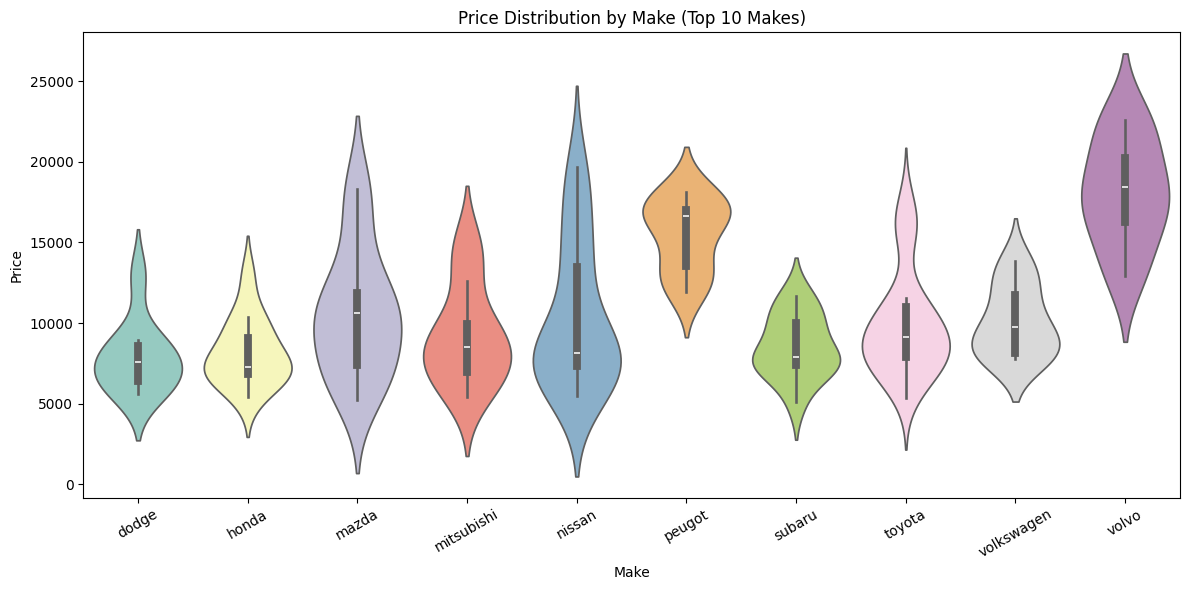

In [48]:
# Advanced visualization: pairplot by drive wheels
# -------------------------------
plot_cols = [
    'engine-size',
    'horsepower',
    'price',
    'city-mpg',
    'highway-mpg',
    'drive-wheels'
]

pairplot_df = automobiles_df[plot_cols].copy()

sns.pairplot(
    pairplot_df,
    hue='drive-wheels',
    diag_kind='hist',
    corner=True
)
plt.suptitle('Pairplot of Key Metrics by Drive Wheels', y=1.02)
plt.show()

# Advanced visualization: violin plot of price by make (top 10 makes)
# -------------------------------
# Limit to top 10 makes by count for readability
make_counts = automobiles_df['make'].value_counts().head(10).index
violin_df = automobiles_df[automobiles_df['make'].isin(make_counts)].copy()

plt.figure(figsize=(12, 6))
sns.violinplot(
    data=violin_df,
    x='make',
    y='price',
    palette='Set3'
)
plt.title('Price Distribution by Make (Top 10 Makes)')
plt.xlabel('Make')
plt.ylabel('Price')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



Findings for Number of Doors
print("Finding: Two-door cars are generally more expensive than four-door cars.")
print("Most four-door cars are in the lower to mid-price range.\n")

Rear-wheel drive (RWD) vehicles tend to be more expensive and show greater price variation.
Front-wheel drive (FWD) vehicles are generally cheaper with less variation.
All-wheel/four-wheel drive (AWD/4WD) vehicles are in between, but the limited number of these cars makes it less conclusive.

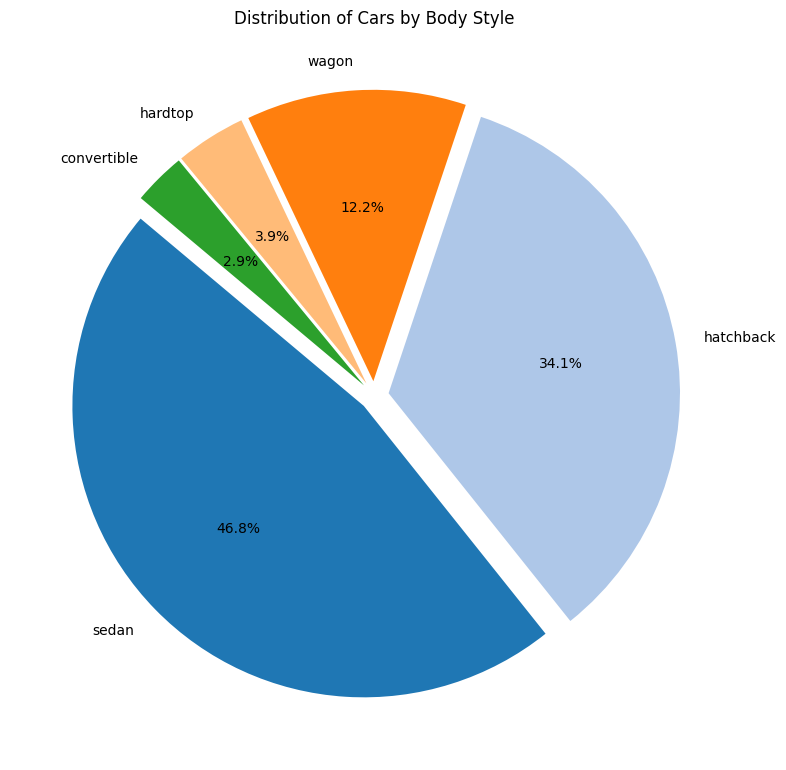

In [49]:

# Count number of cars per body style
# -------------------------------
body_style_counts = automobiles_df['body-style'].value_counts()

# Plot pie chart
# -------------------------------
plt.figure(figsize=(8, 8))
plt.pie(
    body_style_counts,
    labels=body_style_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors,
    explode=[0.05] * len(body_style_counts)  # slightly separate all slices
)
plt.title('Distribution of Cars by Body Style')
plt.tight_layout()
plt.show()


Findings:
> Sedans and hatchbacks are the most common.
>     Convertibles and hardtops are the least common.


#### Which are the 5 most expensive cars?

How do the most expensive and cheapest cars compare? Exploring the most expensive cars highlights if some moviecars are worth the money spent on them based on their fuel economy (mpg or miles per gallon)

Top 5 Most Expensive Cars:

            make   body-style  engine-size  horsepower  city-mpg  highway-mpg  price
1  mercedes-benz      hardtop          304         184        14           16  45400
2            bmw        sedan          209         182        16           22  41315
3  mercedes-benz        sedan          308         184        14           16  40960
4        porsche  convertible          194         207        17           25  37028
5            bmw        sedan          209         182        15           20  36880

Top 5 Cheapest Cars:

         make body-style  engine-size  horsepower  city-mpg  highway-mpg  price
1      subaru  hatchback           97          69        31           36   5118
2   chevrolet  hatchback           61          48        47           53   5151
3       mazda  hatchback           91          68        30           31   5195
4      toyota  hatchback           92          62        35           39   5348
5  mitsubishi  hatchback           92  

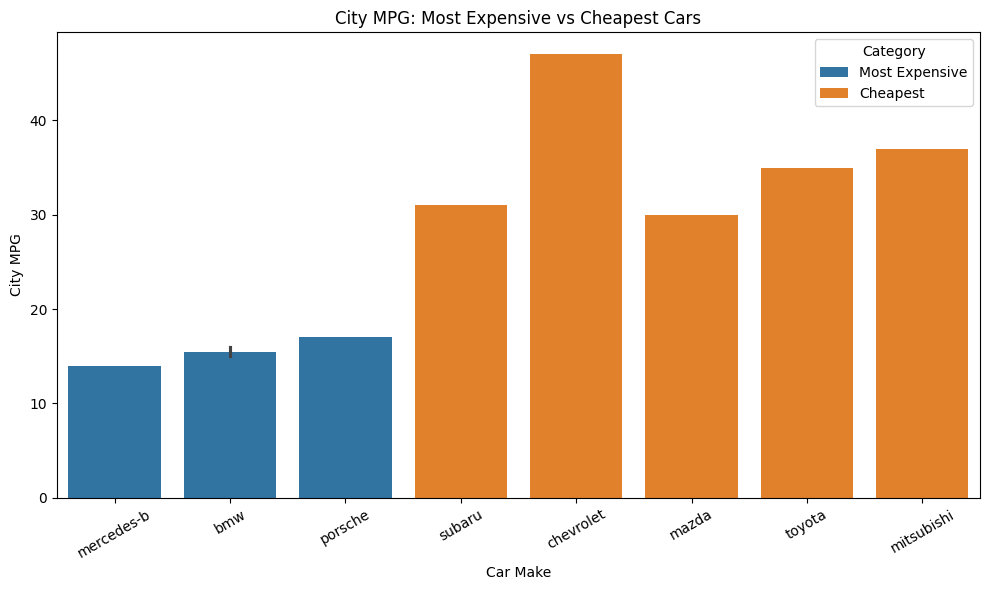

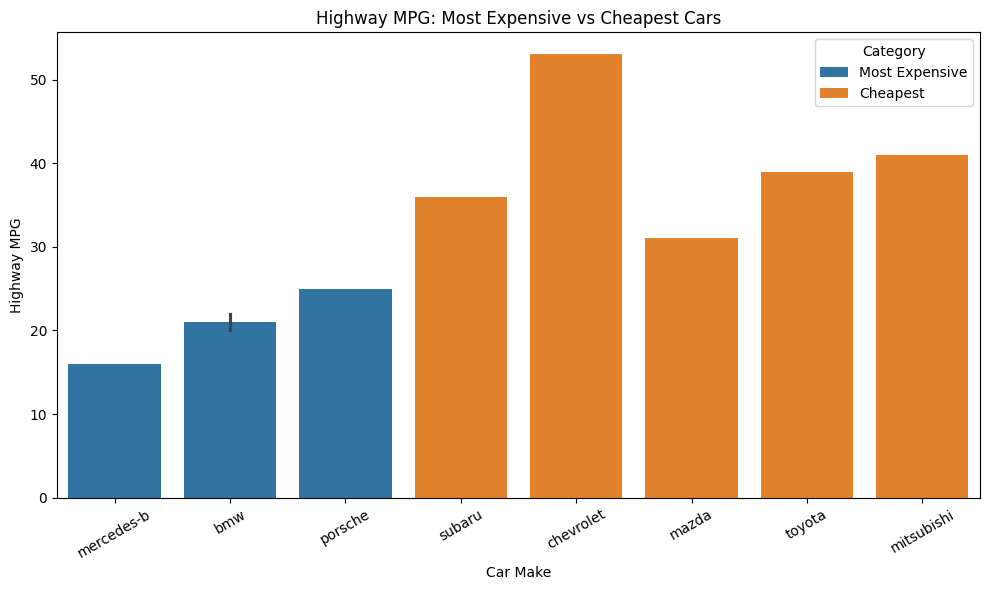

In [50]:

# Columns to display in tables
# -------------------------------
cols = [
    'make',
    'body-style',
    'engine-size',
    'horsepower',
    'city-mpg',
    'highway-mpg',
    'price'
]

# Top 5 most expensive cars
# -------------------------------
most_expensive_cars = automobiles_df.sort_values(
    by='price',
    ascending=False
).head(5)
most_expensive_cars_display = most_expensive_cars[cols].reset_index(drop=True)
most_expensive_cars_display.index += 1

print("Top 5 Most Expensive Cars:\n")
print(most_expensive_cars_display.to_string())

# Top 5 cheapest cars
# -------------------------------
cheapest_cars = automobiles_df.sort_values(
    by='price',
    ascending=True
).head(5)
cheapest_cars_display = cheapest_cars[cols].reset_index(drop=True)
cheapest_cars_display.index += 1

print("\nTop 5 Cheapest Cars:\n")
print(cheapest_cars_display.to_string())

# Combine data for visual comparison
# -------------------------------
comparison = pd.concat([
    most_expensive_cars.assign(Category='Most Expensive'),
    cheapest_cars.assign(Category='Cheapest')
])
comparison['make_short'] = comparison['make'].str[:10]  # shorten for x-axis

# Plot City MPG comparison
# -------------------------------
plt.figure(figsize=(10, 6))
sns.barplot(
    x='make_short',
    y='city-mpg',
    hue='Category',
    data=comparison
)
plt.title('City MPG: Most Expensive vs Cheapest Cars')
plt.xlabel('Car Make')
plt.ylabel('City MPG')
plt.xticks(rotation=30)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

# Plot Highway MPG comparison
# -------------------------------
plt.figure(figsize=(10, 6))
sns.barplot(
    x='make_short',
    y='highway-mpg',
    hue='Category',
    data=comparison
)
plt.title('Highway MPG: Most Expensive vs Cheapest Cars')
plt.xlabel('Car Make')
plt.ylabel('Highway MPG')
plt.xticks(rotation=30)
plt.legend(title='Category')
plt.tight_layout()
plt.show()


Comparison & Insights:
Expensive cars provide power, luxury, and style, but cost more to fuel due to low MPG.
Cheapest cars are affordable and fuel-efficient, making them better for budget-conscious buyers.
If the goal is performance or movie-car appeal, expensive cars may be “worth it” despite poor fuel economy.
If the goal is saving money on fuel and maintenance, cheapest cars are clearly better.

#### Which manufacturer builds the most fuel efficient vehicles?

Compare the average mpg for each vehicle manufacture's vehicles and create a bar plot

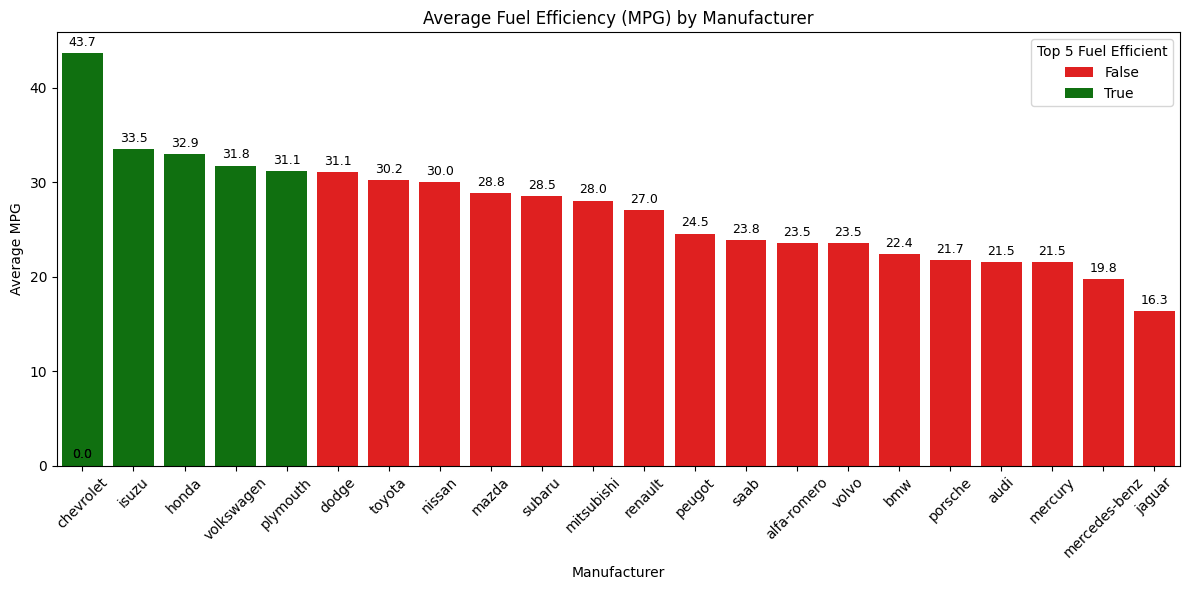

Top 5 Most Fuel-Efficient Manufacturers:

make
chevrolet     43.666667
isuzu         33.500000
honda         32.923077
volkswagen    31.750000
plymouth      31.142857


In [51]:

# Calculate average MPG for each car
# -------------------------------
automobiles_df['avg_mpg'] = (automobiles_df['city-mpg'] + automobiles_df['highway-mpg']) / 2

# Calculate average MPG per manufacturer
# -------------------------------
avg_mpg_by_make = (
    automobiles_df
    .groupby('make')['avg_mpg']
    .mean()
    .sort_values(ascending=False)
)

# Identify top 5 most fuel-efficient manufacturers
# -------------------------------
top5_fuel_efficient = avg_mpg_by_make.head(5)

# Prepare DataFrame for plotting
# -------------------------------
avg_mpg_df = avg_mpg_by_make.reset_index()
avg_mpg_df.columns = ['make', 'avg_mpg']
avg_mpg_df['Top5'] = avg_mpg_df['make'].isin(top5_fuel_efficient.index)

# Plot bar chart highlighting top 5 manufacturers
# -------------------------------
plt.figure(figsize=(12, 6))
bars = sns.barplot(
    x='make',
    y='avg_mpg',
    hue='Top5',
    data=avg_mpg_df,
    dodge=False,
    palette={True: 'green', False: 'red'}
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.title('Average Fuel Efficiency (MPG) by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average MPG')
plt.legend(title='Top 5 Fuel Efficient', loc='upper right')

# Annotate bars with MPG values
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(
        f'{height:.1f}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()

# Display top 5 most fuel-efficient manufacturers
# -------------------------------
print("Top 5 Most Fuel-Efficient Manufacturers:\n")
print(top5_fuel_efficient.to_string())


#### Which vehicles have the largest engine capacity.
Sort the dataframe based on the engine-size column.

Top 5 Vehicles with the Largest Engine Capacity:

            make body-style  engine-size  horsepower  price
1         jaguar      sedan          326         262  36000
2  mercedes-benz      sedan          308         184  40960
3  mercedes-benz    hardtop          304         184  45400
4         jaguar      sedan          258         176  35550
5         jaguar      sedan          258         176  32250


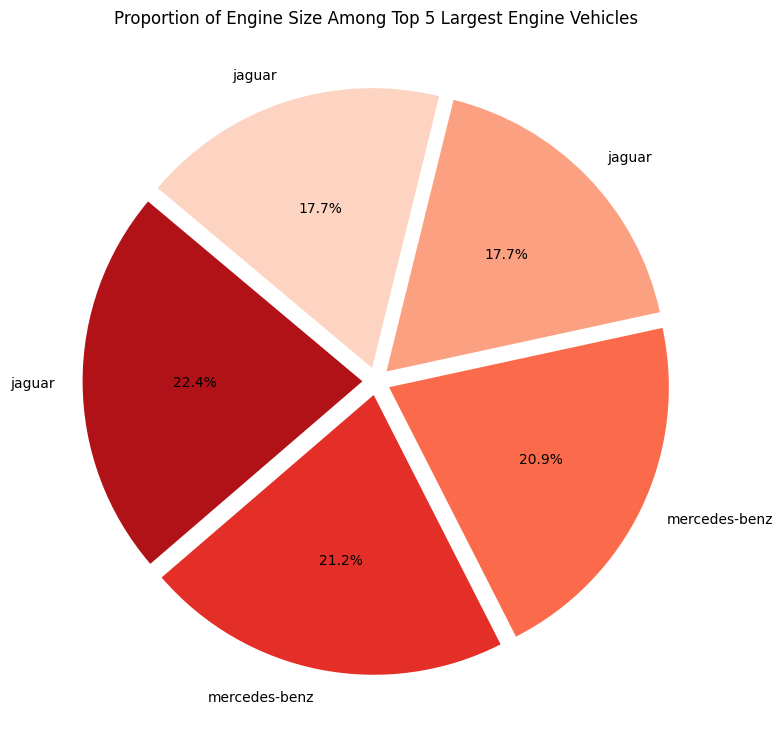

In [52]:

# Find top 5 vehicles with the largest engine
# -------------------------------
largest_engines = automobiles_df.sort_values(by='engine-size', ascending=False)
top5_largest_engines = largest_engines.head(5).reset_index(drop=True)
top5_largest_engines.index += 1  # Start index from 1 for cleaner display

# Display table with relevant columns
# -------------------------------
cols = ['make', 
        'body-style', 
        'engine-size', 
        'horsepower', 
        'price'
]
print("Top 5 Vehicles with the Largest Engine Capacity:\n")
print(top5_largest_engines[cols].to_string())

# Pie chart showing proportion of engine size among top 5 vehicles
# -------------------------------
plt.figure(figsize=(8, 8))
plt.pie(
    top5_largest_engines['engine-size'],
    labels=top5_largest_engines['make'],
    autopct='%1.1f%%',                          # Show percentage on slices
    startangle=140,
    colors=sns.color_palette('Reds_r', 5),
    explode=[0.05] * 5
)
plt.title('Proportion of Engine Size Among Top 5 Largest Engine Vehicles')
plt.tight_layout()
plt.show()


The dataset indicates that luxury brands like Jaguar and Mercedes-Benz dominate the top end of engine capacity. While larger engines provide more power, they come at a higher cost and likely lower fuel efficiency. Buyers of these vehicles prioritize performance and brand prestige over economic considerations.

#### Which vehicle manufacturer has the most car models in the dataset

In [53]:
# Count the number of car models per manufacturer
# -------------------------------
models_per_manufacturer = automobiles_df['make'].value_counts()

# Manufacturer with the most models
# -------------------------------
top_manufacturer = models_per_manufacturer.idxmax()
top_count = models_per_manufacturer.max()

# Display results
# -------------------------------
print("Number of car models per manufacturer:\n")
print(models_per_manufacturer.to_string(), '\n')

print(f"The manufacturer with the most car models is '{top_manufacturer}' with {top_count} models.")


Number of car models per manufacturer:

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1 

The manufacturer with the most car models is 'toyota' with 32 models.


## Next Steps

- Create a feature matrix for modeling (e.g., one-hot encode categorical variables).
- Build a baseline model to predict price and evaluate feature importance.
- Add confidence intervals or bootstrapping for key comparisons.
- Save a small set of report-ready figures for the README.


In [ ]:
# Export key figures for README
# -------------------------------
import os

os.makedirs('images', exist_ok=True)

# Correlation heatmap
# -------------------------------
export_numeric_df = automobiles_df.select_dtypes(include=['int64', 'float64'])
export_corr = export_numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(export_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.savefig('images/correlation-heatmap.png', dpi=200)
plt.close()

# Price distribution by drive wheels
# -------------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='drive-wheels',
    y='price',
    data=automobiles_df,
    color='lightcoral'
)
plt.title('Price Distribution by Drive Wheels')
plt.xlabel('Drive Wheels')
plt.ylabel('Price')
plt.tight_layout()
plt.savefig('images/price-by-drive-wheels.png', dpi=200)
plt.close()

# Average MPG by manufacturer
# -------------------------------
automobiles_df['avg_mpg'] = (automobiles_df['city-mpg'] + automobiles_df['highway-mpg']) / 2
export_avg_mpg = (
    automobiles_df
    .groupby('make')['avg_mpg']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=export_avg_mpg.index,
    y=export_avg_mpg.values,
    color='seagreen'
)
plt.xticks(rotation=45)
plt.title('Average Fuel Efficiency (MPG) by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average MPG')
plt.tight_layout()
plt.savefig('images/avg-mpg-by-make.png', dpi=200)
plt.close()